In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.constants import N_A
import math

In [82]:
# Parameter values

kon = 1e5
koff = 1e-4
Target_cell_number = 5e3
rtot = 1e5
D = 5e-10
cell_radius = 8e-4 # in cm
r_ab = 1.25e-6 # in cm
k2 = 4*D/(math.pi*((r_ab)**2))
alpha2 = k2/koff
t_end = 1000
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]


In [83]:
def model(t, z, Ainit, rtot, kon):
    k = Ainit*kon
    Atot = 1e16*Ainit/Target_cell_number
    beta = Atot/rtot
    alpha1 = k/koff

    dA1 = 2*alpha1*(1-z[0]-2*z[1])*(beta-z[0]-z[1]) - z[0] - alpha2*(1-z[0]-2*z[1])*z[0] + 2*z[1]
    dA2 = alpha2*(1-z[0]-2*z[1])*z[0] - 2*z[1]

    return [dA1, dA2]

Text(0.5, 0, 'time')

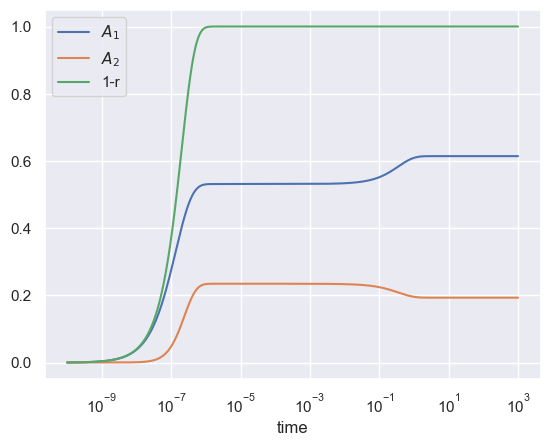

In [84]:
sns.set_theme()
Ainit = 1e-5
z = solve_ivp(model, tspan, z0, method='Radau', t_eval=t, args=(Ainit, rtot, kon))

A1 = z.y[0]
A2 = z.y[1]
r = 1 - (1 - A1 - 2*A2)
plt.plot(t, A1, label=r'$A_1$')
plt.plot(t, A2, label=r'$A_2$')
plt.plot(t, r, label='1-r')
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('time')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelS_10^-5')

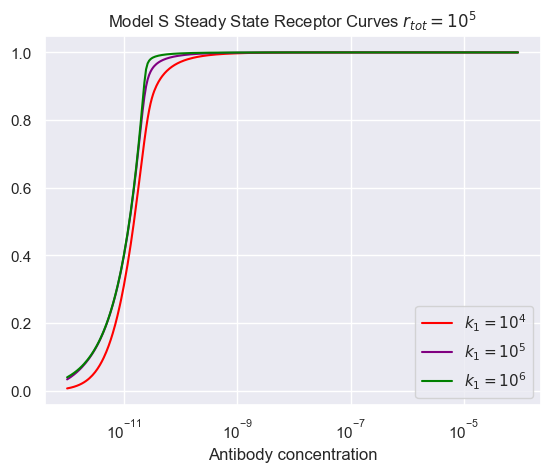

In [85]:
vals = np.linspace(1, 9, 50)

A0s1 = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
A0s = []

for x in A0s1:
    for val in vals:
        A0s.append(x*val)

A1s = np.ones_like(A0s)
A2s = np.ones_like(A0s)

t_end = 100000
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]
r_vals = []
kons = [1e4, 1e5, 1e6,]
rtot=1e2

rs = np.ones_like(A0s)
for val in kons:
    rs = np.ones_like(A0s)
    for i in range(len(A0s)):
        z = solve_ivp(model, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], rtot, val))
        A1 = z.y[0]
        A2 = z.y[1]
        r = 1 - (1 - A1 - 2*A2)
        A1s[i] = A1[-1]
        A2s[i] = A2[-1]
        rs[i] = r[-1]
    r_vals.append(rs)

sns.set_theme()
#labels = [r'$r_{tot}=10^3$', r'$r_{tot}=10^4$', r'$r_{tot}=10^5$', r'$r_{tot}=10^6$', r'$r_{tot}=10^7$']
labels = [r'$k_1 = 10^4$', r'$k_1 = 10^5$', r'$k_1 = 10^6$']
colors=['red', 'purple', 'green']
#plt.plot(A0s, A1s, label = r'$A_1$')
#plt.plot(A0s, A2s, label = r'$A_2$')
plt.title('Model S Steady State Receptor Curves ' + r'$r_{tot}=10^5$')
for i in range(len(r_vals)):
    plt.plot(A0s, r_vals[i], colors[i], label = labels[i])
plt.xscale('log')
plt.xlabel('Antibody concentration')
plt.legend(loc='best')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelS_Receptor_Curves_kon_var_rtot_1e5')
